<a href="https://colab.research.google.com/github/Prabeshrayamajhi/Loan-Status-Prediction/blob/main/Loan_status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Prediction Dataset Description**

The dataset consists of 615 rows and 13 columns and is designed to help predict whether a customer's loan application will be approved or not. The dataset captures a range of applicant characteristics that are commonly considered by financial institutions when assessing loan eligibility.

Columns/Features:



**1.   Loan_ID:**
* Unique identifier for each loan application.




**2. Gender**:

* Gender of the applicant (Male/Female).

**3. Married:**

*  Whether the applicant is married (Yes/No).

**4. Dependents:**

*  The number of dependents the applicant has (0, 1, 2, or 3+).

**5. Education:**

*  Educational background of the applicant (Graduate/Not Graduate).

**6. Self_Employed:**

*  Whether the applicant is self-employed (Yes/No).

**7. ApplicantIncome:**

*  The income of the primary applicant (in monetary units).

**8.  CoapplicantIncome:**

* The income of the co-applicant (if any).

**9. LoanAmount:**

*  The loan amount requested by the applicant (in monetary units). This column contains some missing values.

**10.Loan_Amount_Term:**

*  The term of the loan in months (e.g., 360 months, 180 months). There are some missing values in this column.

**11. Credit_History:**

* Whether the applicant has a history of credit repayment (1 = Yes, 0 = No). This column is important for assessing loan risk and has some missing values.

**12. Property_Area:**

*  The type of area in which the property is located (Urban, Semi-Urban, Rural).

**13. Loan_Status:**

* The target variable. It indicates whether the loan was approved (Y = Yes) or not (N = No).

Importing the dependencies

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import LabelEncoder

Data Collection and Processing

In [81]:
# loading the dataset to Pandas DataFrame
df=pd.read_csv('/content/sample_data/loan_dataset.csv')



In [82]:
# Printing the first 5 rows of dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
# Stats Measures
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
# Counting the total number of null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [86]:
#dropping the missing values
df=df.dropna()

In [87]:
#checking the missing values in each columns
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [88]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [89]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
columns_to_encode = [

   'Gender',
   'Married'	,
   'Dependents',
   'Education',
   'Self_Employed',
   'Property_Area'	,
   'Loan_Status',

]

# Create a dictionary to store label encoders for each column
label_encoders = {}

for column in columns_to_encode:
    # Fit and transform the column
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Save the encoder
    label_encoders[column] = le

# Show the decoded DataFrame
print("Encoded DataFrame:")
df.head()

Encoded DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [90]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


Data Visualization


<Axes: xlabel='Education', ylabel='count'>

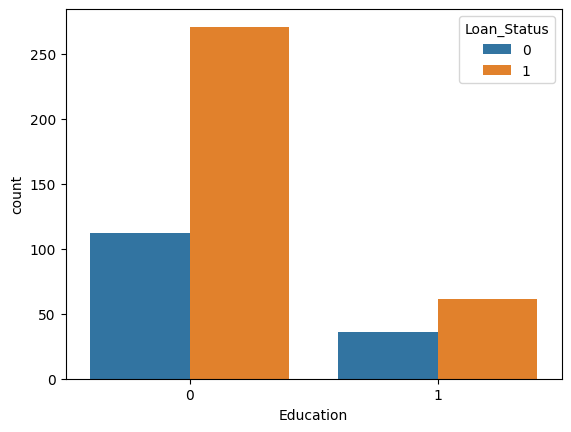

In [91]:
# education vs loan_status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

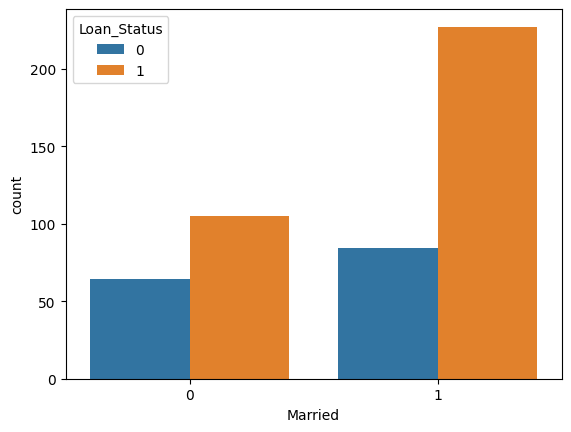

In [92]:
# marital status vs loan_status
sns.countplot(x='Married',hue='Loan_Status',data=df)

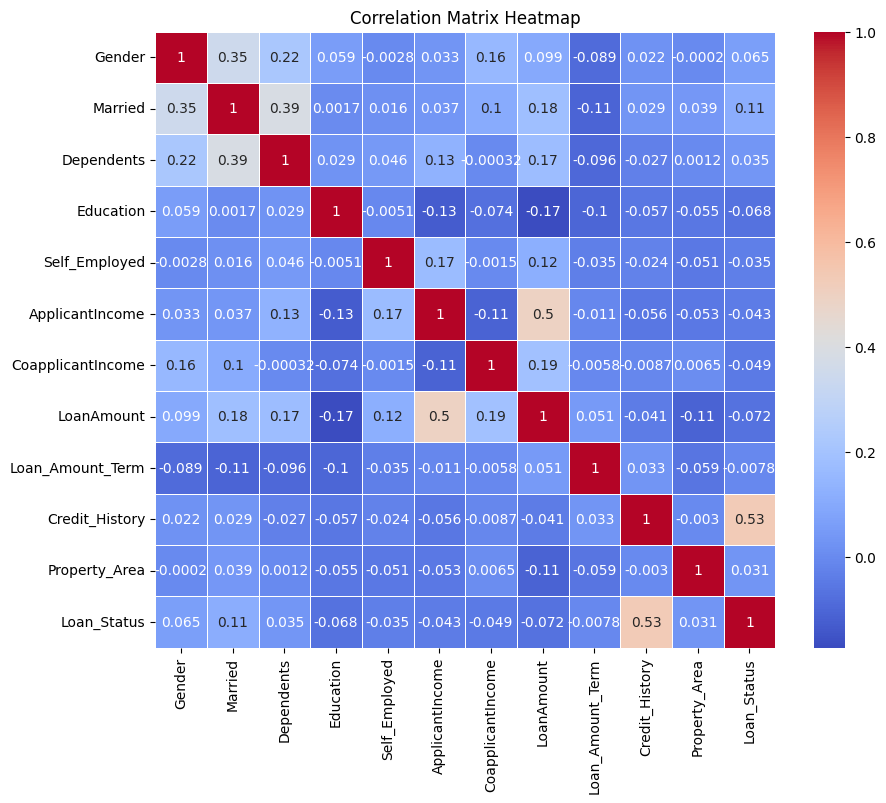

In [93]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix,  cmap='coolwarm', linewidths=0.5,annot=True)

# Set title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()


In [94]:

feature_importance = corr_matrix['Loan_Status'].abs().sort_values()


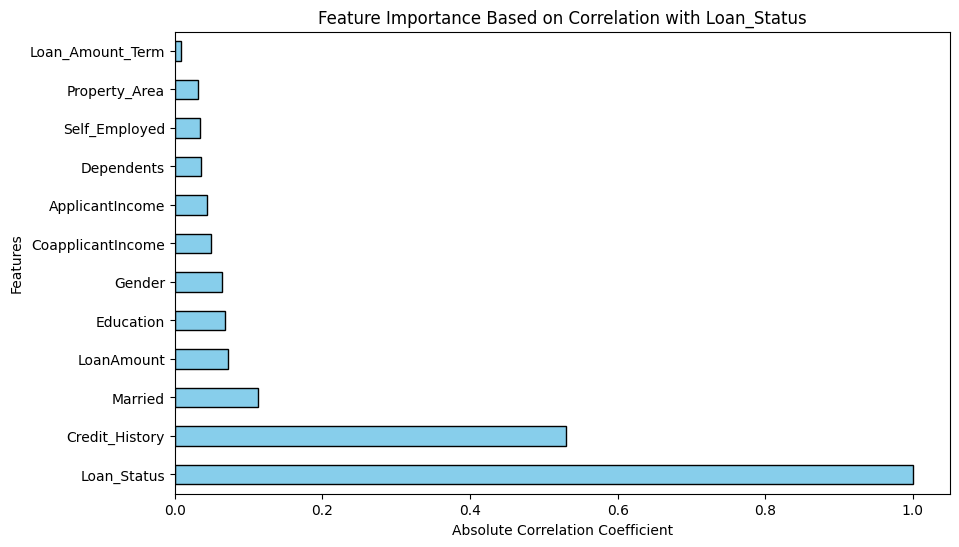

In [95]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Feature Importance Based on Correlation with Loan_Status')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


<Axes: >

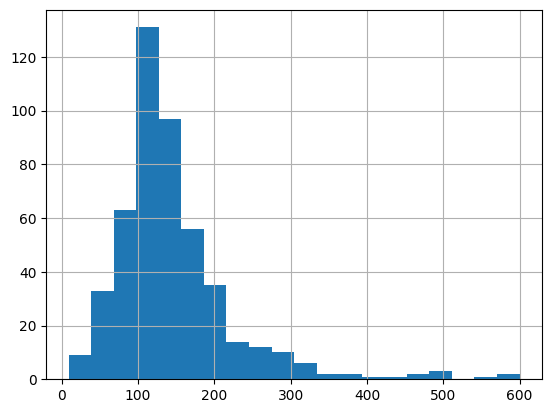

In [96]:
df['LoanAmount'].hist(bins=20)

In [111]:
#Splitting the data and label

X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [112]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [113]:
Y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


# Train test split

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [115]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training the model:



In [118]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, C=1.0),  # Experiment with max_iter and C
    "SVC": SVC(probability=True,C=1,kernel='rbf'),
     "RandomForestClassifier": RandomForestClassifier(n_estimators=100)

}

for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)

    # Evaluate performance
    Y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")


Model: LogisticRegression
Accuracy: 0.8125
Recall: 1.0000
Precision: 0.7805
F1 Score: 0.8767

Model: SVC
Accuracy: 0.8125
Recall: 1.0000
Precision: 0.7805
F1 Score: 0.8767

Model: RandomForestClassifier
Accuracy: 0.7917
Recall: 0.9688
Precision: 0.7750
F1 Score: 0.8611
